<a href="https://colab.research.google.com/github/SuanTay/P3/blob/master/2_1HIDE_KNNscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN** Score

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fr.openfoodfacts.org.products.csv/clean.openfoodfacts.csv', sep='\t', low_memory=False)
df.shape


(528953, 17)

## Préparation des données

In [ ]:
df.isnull().sum()/len(df)

Unnamed: 0            0.000000
code                  0.000000
url                   0.000000
product_name          0.000000
countries_fr          0.000000
nutriscore_score      0.545495
nutriscore_grade      0.545495
pnns_groups_2         0.000000
energy_100g           0.000000
fat_100g              0.000000
saturated-fat_100g    0.000000
carbohydrates_100g    0.000000
sugars_100g           0.000000
fiber_100g            0.000000
proteins_100g         0.000000
salt_100g             0.000000
sodium_100g           0.000000
dtype: float64

on cherche a remlpir les nutri grade :

1.   separer les données entre ceux qui on des nutri grade et ceux qui n'en n'ont pas.
2.   data/target
3.   80/20

In [ ]:
df.columns

Index(['Unnamed: 0', 'code', 'url', 'product_name', 'countries_fr',
       'nutriscore_score', 'nutriscore_grade', 'pnns_groups_2', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0','url','product_name', 'countries_fr','nutriscore_grade','pnns_groups_2'], inplace=True)

In [ ]:
data =df[df['nutriscore_score'].isnull()==False]
data.shape

(240412, 11)

In [ ]:
data_found =df[df['nutriscore_score'].isnull()]
data_found.shape

(288541, 11)

In [ ]:
target = data['nutriscore_score']
target.shape

(240412,)

In [ ]:
data.drop(columns=['nutriscore_score'], inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_found.drop(columns=['nutriscore_score'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)


In [ ]:
xtrain.shape

(192329, 10)

In [ ]:
xtest.shape

(48083, 10)

In [ ]:
from sklearn import neighbors
knn=neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
error =  knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.481575


findfont: Font family ['college'] not found. Falling back to DejaVu Sans.


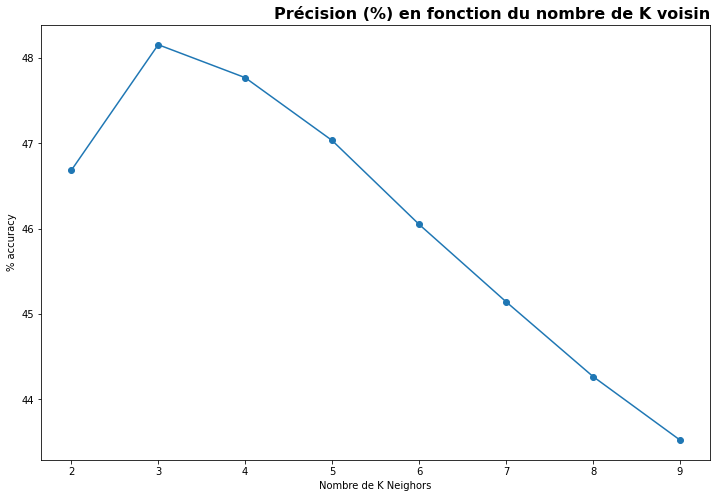

In [ ]:
import matplotlib.pyplot as plt
acuracy = []
for k in range(2,10):
    knn = neighbors.KNeighborsRegressor(k)
    acuracy.append(100*( knn.fit(xtrain, ytrain).score(xtest, ytest)))
    #Acuracy
plt.figure(figsize=(12, 8))
plt.plot(range(2,10), acuracy, 'o-')
plt.title('Précision (%) en fonction du nombre de K voisin',fontdict={'family': 'college', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16},
          loc='right')
plt.xlabel('Nombre de K Neighors')
plt.ylabel('% accuracy')
#ajouter légende 
plt.show()
#on prend la plus haute

In [ ]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsRegressor(3)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(data_found)

data_found['nutriscore_score']=predicted

data_found.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,code,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_score
0,0000000000017,1569.0,7.0,3.08,70.1,15.0,0.0,7.8,1.400,0.5600,3.000000
2,0000000000123,88.0,0.0,0.00,4.8,0.4,0.0,0.2,2.040,0.8160,4.666667
3,0000000000178,251.0,3.0,1.00,10.0,3.0,0.0,2.0,1.150,0.4600,4.666667
5,0000000000970,540.0,4.9,3.10,16.3,16.3,0.0,4.4,0.250,0.1000,1.666667
6,0000000001137,929.0,3.3,2.10,38.4,1.8,0.0,11.7,0.678,0.2712,9.333333


In [ ]:
data_found.shape

(289131, 11)

In [ ]:
data.shape

(241154, 10)

In [ ]:
data_found[data_found.nutriscore_score>=2]

,code,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_score
0,0000000000017,1569.0,7.0,3.08,70.1,15.0,0.00,7.8,1.400,0.5600,4.000000
2,0000000000123,88.0,0.0,0.00,4.8,0.4,0.00,0.2,2.040,0.8160,2.666667
3,0000000000178,251.0,3.0,1.00,10.0,3.0,0.00,2.0,1.150,0.4600,5.000000
6,0000000001137,929.0,3.3,2.10,38.4,1.8,0.00,11.7,0.678,0.2712,8.000000
7,000000000114,2439.0,44.0,28.00,30.0,27.0,0.00,2.1,0.020,0.0080,16.333333
...,...,...,...,...,...,...,...,...,...,...,...
530256,9310179008600,201.0,0.0,0.00,10.9,10.0,0.00,40.0,0.040,0.0160,9.000000
530259,9311627604382,50.0,0.0,0.00,2.8,1.7,0.02,0.1,1.016,0.4064,11.000000
530271,9556041612692,326.0,0.0,0.00,16.0,14.0,0.00,1.7,4.400,1.7600,15.666667
530273,9556041612371,816.0,1.0,1.00,47.8,47.6,0.00,1.0,0.375,0.1500,15.666667


In [ ]:
data_found[data_found['energy_100g']>0]

,code,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_score
0,0000000000017,1569.0,7.0,3.08,70.1,15.0,0.00,7.8,1.400,0.5600,4.000000
2,0000000000123,88.0,0.0,0.00,4.8,0.4,0.00,0.2,2.040,0.8160,2.666667
3,0000000000178,251.0,3.0,1.00,10.0,3.0,0.00,2.0,1.150,0.4600,5.000000
5,0000000000970,540.0,4.9,3.10,16.3,16.3,0.00,4.4,0.250,0.1000,0.333333
6,0000000001137,929.0,3.3,2.10,38.4,1.8,0.00,11.7,0.678,0.2712,8.000000
...,...,...,...,...,...,...,...,...,...,...,...
530256,9310179008600,201.0,0.0,0.00,10.9,10.0,0.00,40.0,0.040,0.0160,9.000000
530259,9311627604382,50.0,0.0,0.00,2.8,1.7,0.02,0.1,1.016,0.4064,11.000000
530271,9556041612692,326.0,0.0,0.00,16.0,14.0,0.00,1.7,4.400,1.7600,15.666667
530273,9556041612371,816.0,1.0,1.00,47.8,47.6,0.00,1.0,0.375,0.1500,15.666667


In [ ]:
data['nutriscore_score']=target


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data = data.append(data_found)

In [ ]:
data.shape

(528953, 11)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


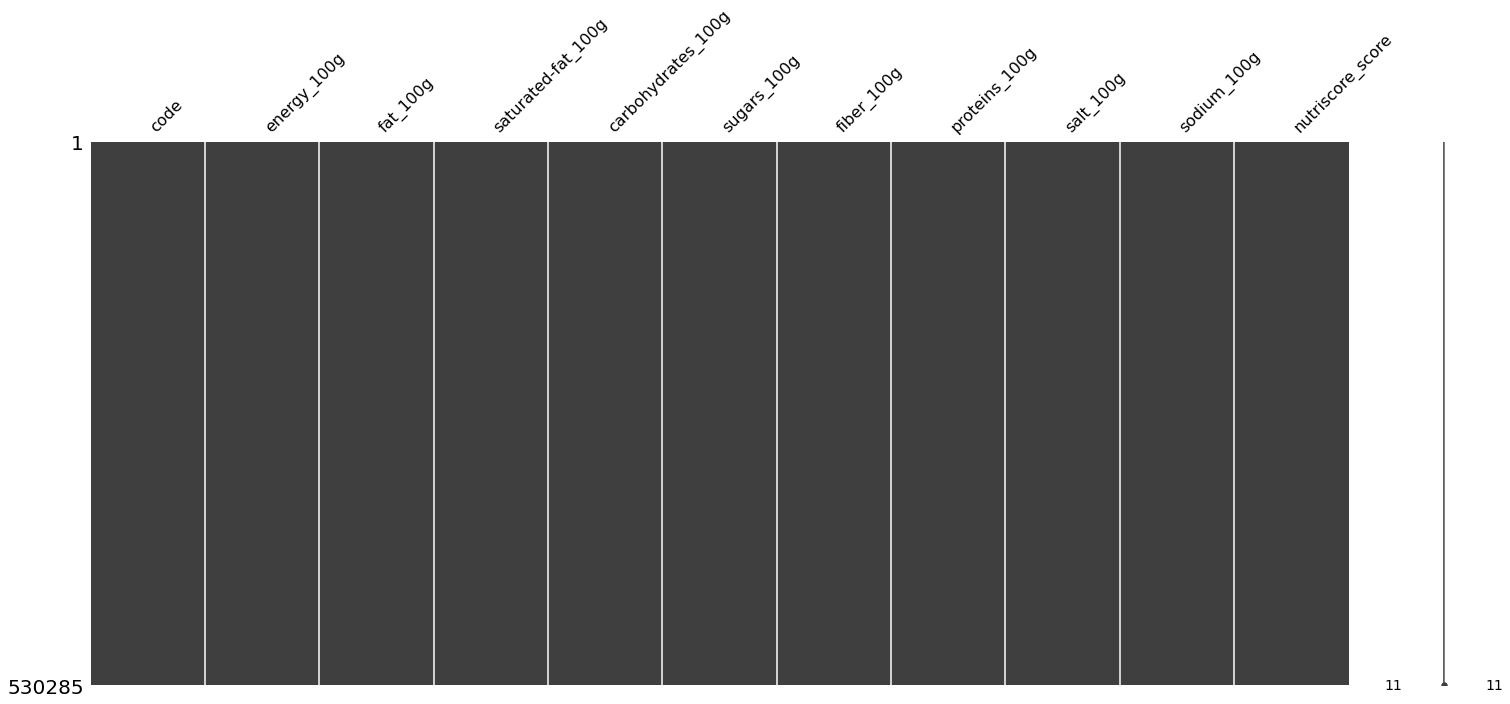

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/fr.openfoodfacts.org.products.csv/knn.nutriscore.fr.clean.lowfeatures.openfoodfacts.org.products.csv',sep='\t', encoding='utf-8', header=True)

In [ ]:
data.columns

Index(['code', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutriscore_score'],
      dtype='object')

In [ ]:
df2 =pd.merge ( df, data , on=['code', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'])
df2.drop(columns= ['nutriscore_score_x'],inplace=True)
df2 = df2.rename(columns={'nutriscore_score_y': 'nutriscore_score'})
#msno.matrix(df2)

In [ ]:
df2.to_csv('/content/drive/My Drive/Colab Notebooks/fr.openfoodfacts.org.products.csv/mergeNS.knn.nutriscore.fr.clean.lowfeatures.openfoodfacts.org.products.csv',sep='\t', encoding='utf-8', header=True)

In [ ]:
len(df2)

528953